# Inferencia sobre el Dataset Simplified Human Activity Tracking
Dataset simplificado (el que vamos a usar): https://www.kaggle.com/mboaglio/simplifiedhuarus

Clasificaremos la actividad que se estaba realizando: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING y LAYING

Para cada registro en el dataset se proporciona:
- Aceleración triaxial del acelerómetro (aceleración total) y la aceleración corporal estimada.
- Velocidad angular triaxial desde el giroscopio.
- Un vector de características 561 con variables de dominio de tiempo y frecuencia.
- Su etiqueta de actividad.
- Un identificador del sujeto que realizó el experimento.


## Nombre del Endpoint con el modelo que armó Autopilot

In [1]:
ep_name = 'AutoML-Autopilot--notebook-run-01-15-10-53'

In [2]:
import boto3,sys
sm_rt = boto3.Session().client('runtime.sagemaker')

# Loop para hacer inferencia de cada item del dataset. Calculo metricas del modelo.
### Lo ideal aca es hacer un BATCH TRANSFORM con el dataset entero ... pero eso queda para otra demo :D

In [3]:
import numpy

activities = ['SITTING', 'WALKING', 'LAYING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'STANDING']
cm = numpy.zeros(shape=(6,6))
 
print ("Infiriendo y armando matriz de confusion:")

with open('had-autopilot-test.csv') as f:
    lines = f.readlines()
    for l in lines[1:]:  

        # Saco el campo "activity" del registro y mando al endpoint el resto de los campos separados por una coma.
        # El campo "activity" es el "label" que vamos a predecir con el endpoint.
        l = l.split(',')  
        label = l[0]     
        l = l[1:]        
        l = ','.join(l)
                
        response = sm_rt.invoke_endpoint(EndpointName=ep_name, ContentType='text/csv', Accept='text/csv', Body=l)

        # Saco el newline del body
        response = response['Body'].read().decode("utf-8")
        response = response.rstrip("\n")
        
        # Armo la matriz de confusion sumando las labels vs las labels inferidas por el modelo
        cm[activities.index(label), activities.index(response)] = cm[activities.index(label), activities.index(response)] + 1
        
        print (".", end ="")

            
print ("\nListo!")

Infiriendo y armando matriz de confusion:
.....................................................................................................................................................................................
Listo!


# Armo y muestro Matriz de confusión
## La muestro como Heatmap

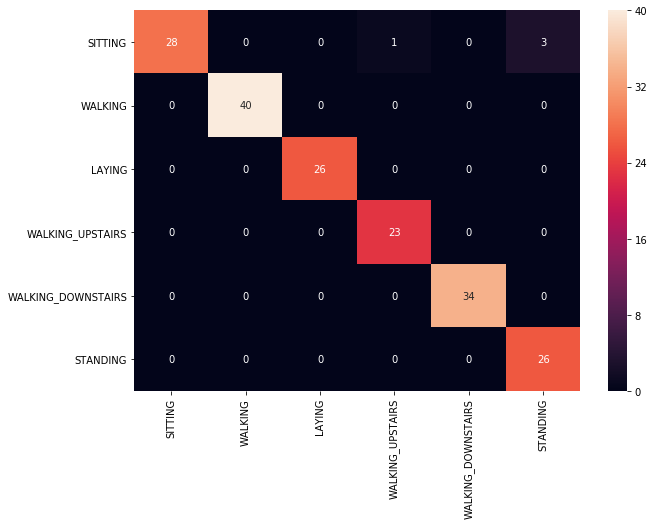

In [4]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# Imprimo la matriz de confusion como Heatmap
df_cm = pd.DataFrame(cm, index = [i for i in activities],
                  columns = [i for i in activities])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

# Accuracy del modelo

In [5]:
accuracy = cm.diagonal().sum() / cm.sum()
print("Accuracy: {}".format(accuracy))

Accuracy: 0.9779005524861878
